In [1]:
import pandas as pd
import os
from ydata_profiling import ProfileReport
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración de rutas
base_dir = os.getcwd()
fichero_path = os.path.join(
    base_dir, "..", "data", "raw", "thiroid_cancer_raw.csv"
)


### INFORMACIÓN DEL DATAFRAME
 - Age:
**Edad del paciente.**

 - Gender:
**Género del paciente.**

 - Country:
**País de origen o residencia**.

 - Ethnicity:
**Grupo étnico del paciente.**

 - Family_History:
**Antecedentes familiares de cáncer de tiroides.**

 - Radiation_Exposure:
**Exposición previa a radiación, especialmente en cuello o cabeza.**

 - Iodine_Deficiency:
**Deficiencia de yodo en la dieta.**

 - Smoking:
**Historial de tabaquismo.**

 - Obesity:
**Obesidad del paciente.**

 - Diabetes:
**Presencia de diabetes.**

 - TSH_Level:
**Nivel de hormona estimulante de la tiroides (TSH).**

 - T3_Level:
**Nivel de triyodotironina (T3).**

 - T4_Level:
**Nivel de tiroxina (T4).**

 - Nodule_Size:
**Tamaño del nódulo tiroideo.**

 - Diagnostico:
**Diagnóstico final (variable objetivo).**

In [3]:
df = pd.read_csv(fichero_path)
df

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Diagnostico
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,0
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,0
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,0
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,0
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,0
212687,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,0
212688,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,0
212689,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,0


- Resume todo lo importante de los datos: tipos de columnas, valores faltantes, estadísticas, correlaciones, distribuciones ...

In [22]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Tipos de dato de cada columna

In [6]:
df.dtypes

Age                     int64
Gender                 object
Country                object
Ethnicity              object
Family_History         object
Radiation_Exposure     object
Iodine_Deficiency      object
Smoking                object
Obesity                object
Diabetes               object
TSH_Level             float64
T3_Level              float64
T4_Level              float64
Nodule_Size           float64
Diagnostico             int64
dtype: object

- Busqueda de valores nulos

In [5]:
# No hay nulos
df.isna().sum()

Age                   0
Gender                0
Country               0
Ethnicity             0
Family_History        0
Radiation_Exposure    0
Iodine_Deficiency     0
Smoking               0
Obesity               0
Diabetes              0
TSH_Level             0
T3_Level              0
T4_Level              0
Nodule_Size           0
Diagnostico           0
dtype: int64

- Hay 10 paises en total

In [6]:
# 10 paises
df["Country"].value_counts()

Country
India          42496
China          31978
Nigeria        31918
Brazil         21413
Russia         21297
Japan          16867
South Korea    14965
UK             10642
USA            10558
Germany        10557
Name: count, dtype: int64

- 5 etnias

In [ ]:
# 5 etnias
df["Ethnicity"].value_counts()

Ethnicity
Caucasian         63669
Asian             53261
African           42414
Hispanic          32012
Middle Eastern    21335
Name: count, dtype: int64

- Más registros de pacientes que no tiene cáncer

In [8]:
# Más negativos que positivos
df["Diagnostico"].value_counts()

Diagnostico
0    163196
1     49495
Name: count, dtype: int64

- Descripción de la edad, no hay outliers

In [9]:
# No parece haber outliers
df["Age"].describe()

count    212691.000000
mean         51.918497
std          21.632815
min          15.000000
25%          33.000000
50%          52.000000
75%          71.000000
max          89.000000
Name: Age, dtype: float64

### País de procedencia de todos los pacientes

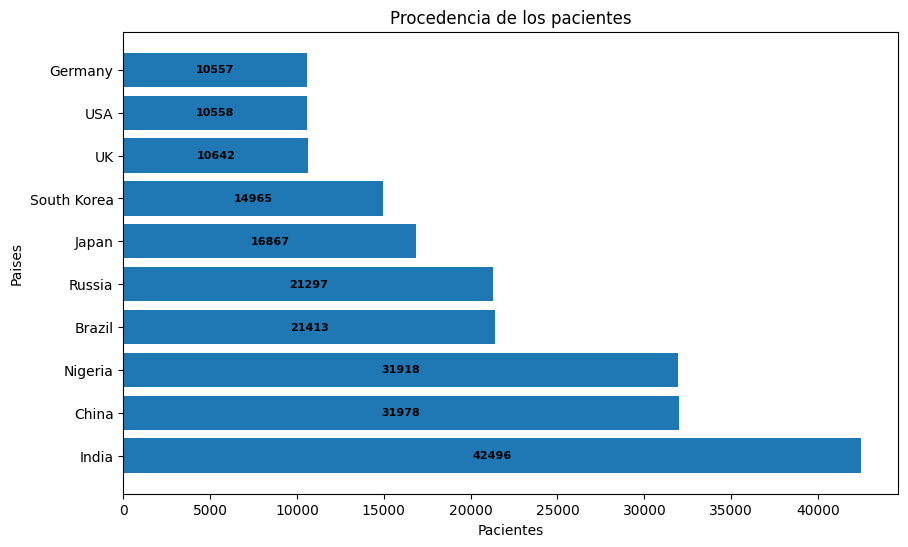

In [10]:
# Dataframe que contiene paises y registros
df_counts = df['Country'].value_counts().reset_index()
df_counts.columns = ['Country', 'Registros']
df_counts = df_counts.sort_values(by='Registros', ascending=False)

plt.figure(figsize=(10, 6))
bars=plt.barh(df_counts['Country'], df_counts['Registros'])
plt.title("Procedencia de los pacientes")
plt.xlabel("Pacientes")
plt.ylabel("Paises")

# Texto de las barras
for bar in bars:
    plt.text(bar.get_width() / 2,  # Posición X (mitad de la barra)
             bar.get_y() + bar.get_height() / 2,  # Posición Y (centro de la barra)
             str(int(bar.get_width())),  # Convertir el número en texto
             ha='center', va='center', color='black', fontsize=8, fontweight='bold')

plt.show()


### Etnia a la que pertenecen los pacientes

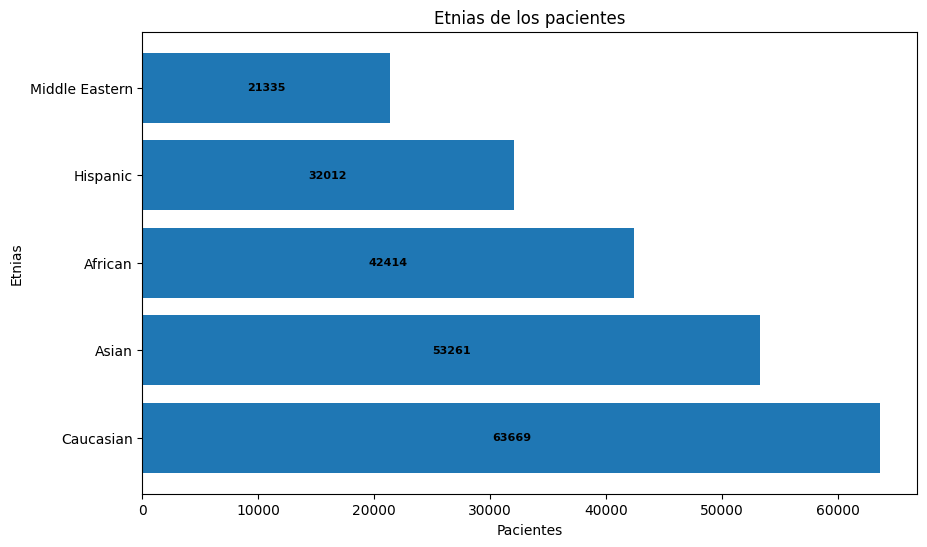

In [ ]:
# Dataframe que contiene etnias y registros
df_counts = df['Ethnicity'].value_counts().reset_index()
df_counts.columns = ['Ethnicity', 'Registros']
df_counts = df_counts.sort_values(by='Registros', ascending=False)

plt.figure(figsize=(10, 6))
bars=plt.barh(df_counts['Ethnicity'], df_counts['Registros'])
plt.title("Etnias de los pacientes")
plt.xlabel("Pacientes")
plt.ylabel("Etnias")

# Texto de las barras
for bar in bars:
    plt.text(bar.get_width() / 2,  # Posición X (mitad de la barra)
             bar.get_y() + bar.get_height() / 2,  # Posición Y (centro de la barra)
             str(int(bar.get_width())),  # Convertir el número en texto
             ha='center', va='center', color='black', fontsize=8, fontweight='bold')

plt.show()


### Cuántos valores hay de cada clase (Cáncer y no Cáncer)

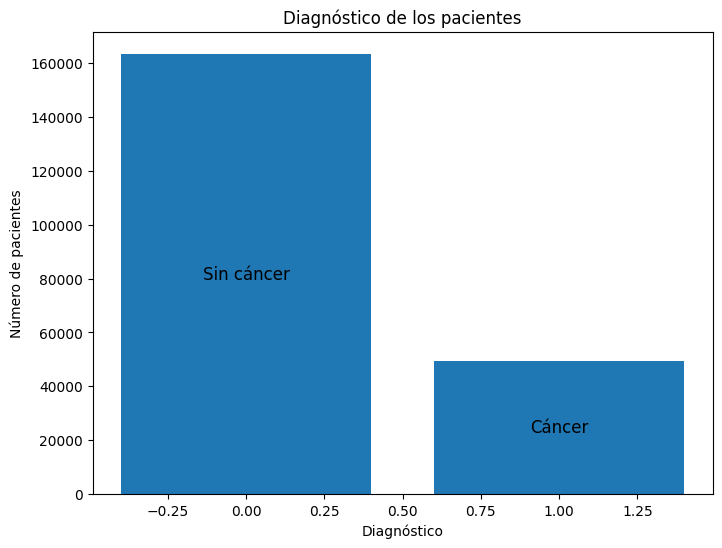

In [9]:
plt.figure(figsize=(8, 6))
info = ["Sin cáncer","Cáncer"]
barras = plt.bar( df["Diagnostico"].value_counts().index, df["Diagnostico"].value_counts().values)
plt.title("Diagnóstico de los pacientes")
plt.xlabel("Diagnóstico")
plt.ylabel("Número de pacientes")
for i, barra in enumerate(barras):
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,  
        altura / 2,                             
        f'{info[i]}',                       # Texto a mostrar
        ha='center', va='center', color='black', fontsize=12
    )

### Diagnóstico de cada paciente por país

Text(0.5, 1.0, 'Diagnósticos de Tiroides por País')

<Figure size 1200x600 with 0 Axes>

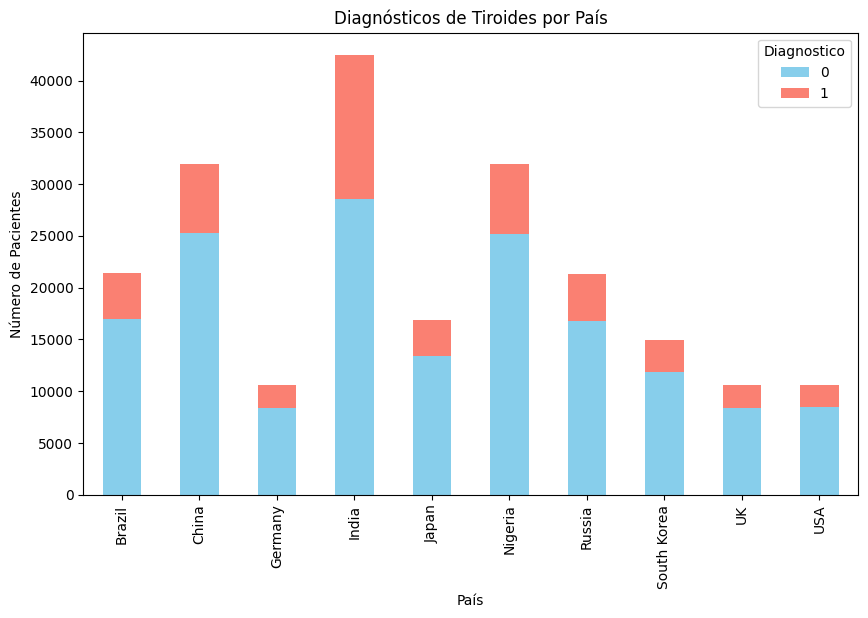

In [13]:
plt.figure(figsize=(12, 6))

df_stacked = df.groupby(['Country', 'Diagnostico']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
df_stacked.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])
# Etiquetas y título
plt.ylabel('Número de Pacientes')
plt.xlabel('País')
plt.title('Diagnósticos de Tiroides por País')

### Diagnóstico de cada paciente por etnia

Text(0.5, 1.0, 'Diagnósticos de Tiroides por Etnia')

<Figure size 1200x600 with 0 Axes>

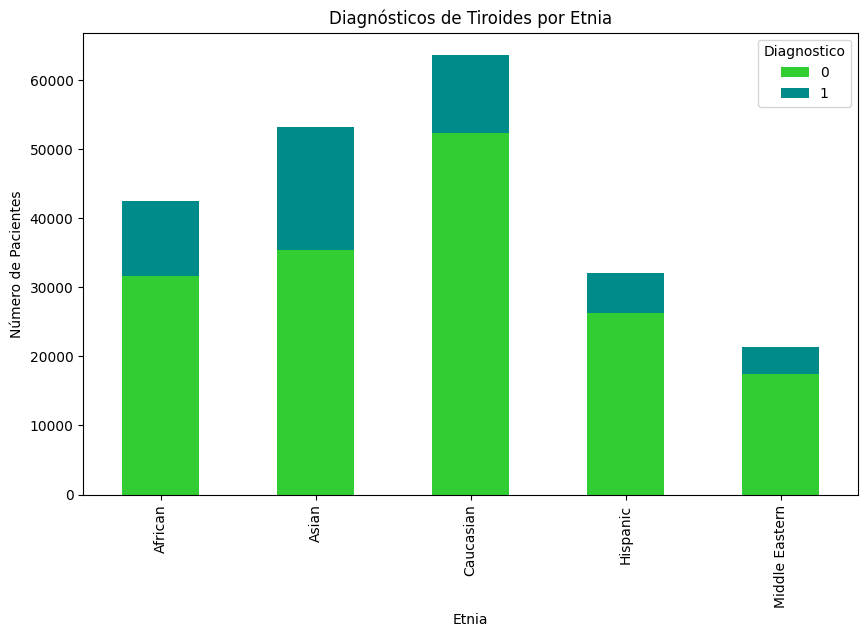

In [14]:
plt.figure(figsize=(12, 6))

df_stacked = df.groupby(['Ethnicity', 'Diagnostico']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
df_stacked.plot(kind='bar', stacked=True, ax=ax, color=['limegreen', 'darkcyan'])
# Etiquetas y título
plt.ylabel('Número de Pacientes')
plt.xlabel('Etnia')
plt.title('Diagnósticos de Tiroides por Etnia')

### Diagnóstico de cada paciente según su sexo

Text(0.5, 1.0, 'Diagnósticos de Tiroides por Género')

<Figure size 1200x600 with 0 Axes>

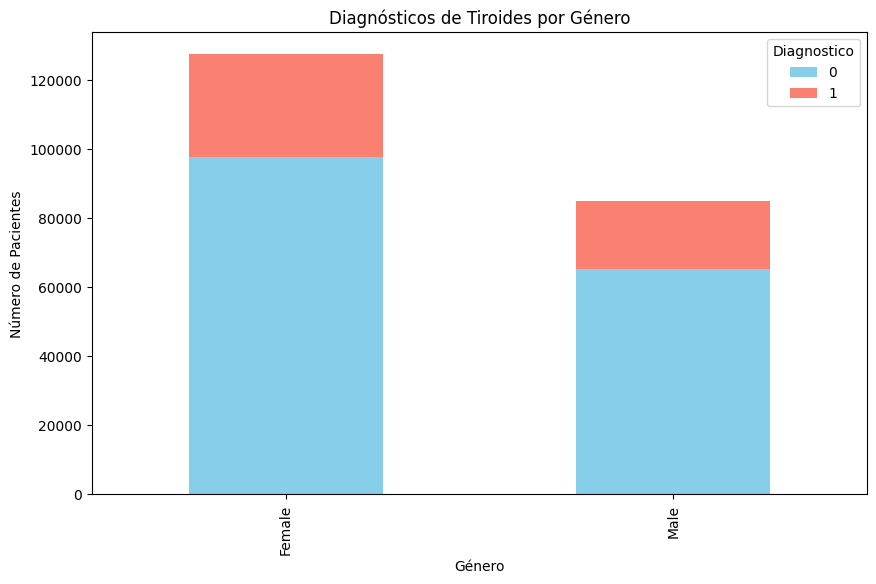

In [13]:
plt.figure(figsize=(12, 6))

df_stacked = df.groupby(['Gender', 'Diagnostico']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
df_stacked.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])
# Etiquetas y título
plt.ylabel('Número de Pacientes')
plt.xlabel('Género')
plt.title('Diagnósticos de Tiroides por Género')

### Muestra como se distribuyen los diagnosticos entre los dos sexos (hay más mujeres)

In [12]:
df.groupby(['Gender', 'Diagnostico']).size().reset_index(name='Conteo')

,Gender,Diagnostico,Conteo
0,Female,0,97787
1,Female,1,29740
2,Male,0,65409
3,Male,1,19755


- Me dice la importancia de cada variable frente a la variable objetivo, pero hay muchas columnas que no se pueden graficar

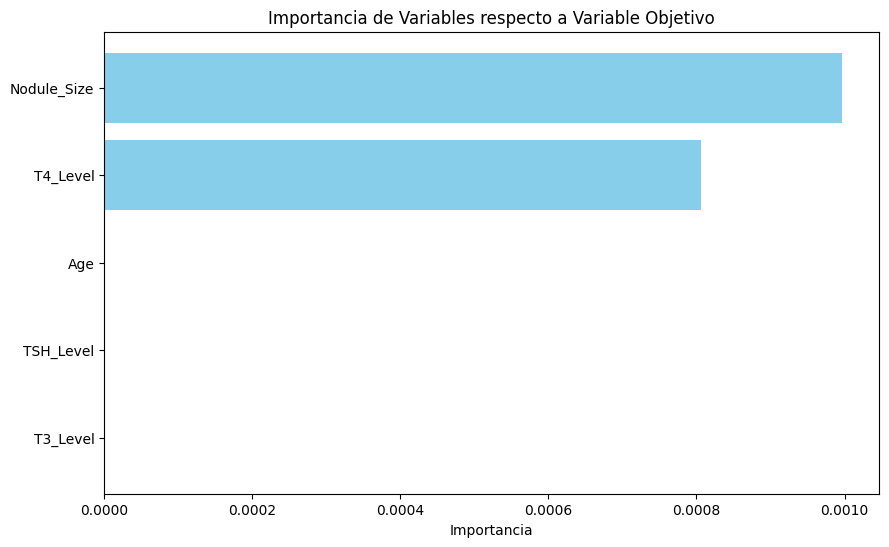

In [ ]:
X = df.drop(['Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes','Diagnostico'], axis=1)
y = df['Diagnostico']

# Calcular importancia
importancias = mutual_info_classif(X, y, discrete_features='auto')

importancias_df = pd.DataFrame({'feature': X.columns, 'importance': importancias})
importancias_df = importancias_df.sort_values(by='importance', ascending=False)

# Graficar
plt.figure(figsize=(10,6))
plt.barh(importancias_df['feature'], importancias_df['importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de Variables respecto a Variable Objetivo')
plt.gca().invert_yaxis()
plt.show()
